# Descriptive Statistic & Visualization

## Descriptive Statistic

### Setup

In [1]:
# Make Jupyter reload library before every execution

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd


df= pd.read_csv('data/all.csv', parse_dates=True, )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Timestamp                        108 non-null    object 
 1   Age Group                        108 non-null    object 
 2   Gender                           108 non-null    object 
 3   Education Level                  108 non-null    object 
 4   Occupation                       108 non-null    object 
 5   Exercise Days/Week               108 non-null    object 
 6   Device Usage (hrs/day)           107 non-null    object 
 7   Screen Time Before Sleep         108 non-null    object 
 8   Height (cm)                      83 non-null     float64
 9   Weight (kg)                      92 non-null     float64
 10  Bedtime                          108 non-null    object 
 11  Wake-up Time                     108 non-null    object 
 12  Sleep Onset Time      

In [3]:
df.drop(labels=["Timestamp"], inplace=True, axis=1)
df.sample(5)

,Age Group,Gender,Education Level,Occupation,Exercise Days/Week,Device Usage (hrs/day),Screen Time Before Sleep,Height (cm),Weight (kg),Bedtime,Wake-up Time,Sleep Onset Time,Nap Duration,Sleep Duration (hrs/24hr),Sleep Quality,Sleep Disturbances,Sleep Medication,Language,BMI,Calculated Night Sleep Duration
99,25-34,Female,Doctorate,Student,5+ Days,7+ Hours,1-2 Hours,160.0,60.0,02:00,08:30,15-30 Minutes,No Nap,4-6 Hours,3,Sometimes,No,Vietnamese,23.4,6.5
85,25-34,Male,Doctorate/Prof.,Professional/Office Worker,0 Days,7+ Hours,30-60 Minutes,168.0,71.0,23:30,06:00,15-30 Minutes,No Nap,4-6 Hours,5,Never,No,Bengali,25.2,6.5
70,25-34,Female,Bachelor's,Other,0 Days,7+ Hours,2+ Hours,153.4,68.0,00:30,09:30,<15 Minutes,No Nap,4-6 Hours,3,Often,No,Bengali,28.9,9.0
92,25-34,Female,Master's,Professional/Office Worker,3-4 Days,4-6 Hours,1-2 Hours,NaN,NaN,23:00,06:00,<15 Minutes,No Nap,6+ Hours,4,Rarely,No,Vietnamese,NaN,7.0
83,Other,Male,Doctorate/Prof.,Other,1-2 Days,7+ Hours,30-60 Minutes,NaN,NaN,00:00,08:00,15-30 Minutes,No Nap,6+ Hours,3,Never,No,Bengali,NaN,8.0


### Overall descriptive stats

In [4]:
# Calculating descriptive statistics for the dataset
descriptive_stats = df.describe()

# Since describe() includes only numeric data by default, adding additional descriptive statistics for non-numeric data
non_numeric_stats = df.describe(include=[object])


In [5]:
descriptive_stats

,Height (cm),Weight (kg),Sleep Quality,BMI,Calculated Night Sleep Duration
count,83.000000,92.000000,108.000000,80.000000,105.000000
mean,165.305542,67.415217,3.444444,24.552500,7.036952
std,8.321679,12.798085,0.824092,4.245503,1.368431
min,150.000000,43.000000,2.000000,17.500000,1.670000
25%,160.000000,59.800000,3.000000,21.500000,6.500000
50%,167.000000,68.000000,3.000000,23.550000,7.000000
75%,171.000000,75.000000,4.000000,26.600000,8.000000
max,185.000000,100.000000,5.000000,39.400000,9.750000


- **Sleep Quality:** On average, respondents rated their sleep quality around 3 on a scale, indicating moderate sleep quality.
- **BMI:** The average Body Mass Index (BMI) is around 23.55, with a range extending from 16.5 to 39.4.
- **Calculated Night Sleep Duration:** The average night sleep duration is around 7 hours, with a wide range from 1.67 hours to almost 9.75 hours.

In [6]:
non_numeric_stats

,Age Group,Gender,Education Level,Occupation,Exercise Days/Week,Device Usage (hrs/day),Screen Time Before Sleep,Bedtime,Wake-up Time,Sleep Onset Time,Nap Duration,Sleep Duration (hrs/24hr),Sleep Disturbances,Sleep Medication,Language
count,108,108,108,108,108,107,108,108,108,108,108,107,108,108,108
unique,5,3,5,7,4,3,4,18,20,4,11,3,5,2,4
top,25-34,Male,Master's,Student,1-2 Days,7+ Hours,30-60 Minutes,23:00,07:00,15-30 Minutes,No Nap,6+ Hours,Rarely,No,English
freq,72,67,47,47,43,43,45,24,18,55,61,64,48,105,68


- **Age Group:** The most common age group among respondents is 25-34.
- **Gender:** A slightly higher number of male respondents compared to females.
- **Education Level:** The majority of respondents have a Master's degree.
- **Occupation:** Many respondents are students.
- **Exercise Days/Week:** '1-2 Days' is the most common response for exercise frequency.
- **Device Usage (hrs/day):** A large portion of respondents use devices for '7+ Hours' per day.
- **Screen Time Before Sleep:** '30-60 Minutes' is the most common duration for screen time before sleep.
- **Sleep Disturbances:** 'Rarely' is the most frequent response, indicating that most respondents rarely experience sleep disturbances.
- **Sleep Medication:** The majority of respondents do not use sleep medication.
- **Language:** English is the most common language among respondents.

### Sleep related fields

In [7]:
sleep_related_columns = ['Sleep Duration (hrs/24hr)', 'Sleep Quality', 'Sleep Disturbances', 'Sleep Medication', 'Calculated Night Sleep Duration']
sleep_descriptive_stats = df[sleep_related_columns].describe(include='all')

sleep_descriptive_stats

,Sleep Duration (hrs/24hr),Sleep Quality,Sleep Disturbances,Sleep Medication,Calculated Night Sleep Duration
count,107,108.000000,108,108,105.000000
unique,3,NaN,5,2,NaN
top,6+ Hours,NaN,Rarely,No,NaN
freq,64,NaN,48,105,NaN
mean,NaN,3.444444,NaN,NaN,7.036952
std,NaN,0.824092,NaN,NaN,1.368431
min,NaN,2.000000,NaN,NaN,1.670000
25%,NaN,3.000000,NaN,NaN,6.500000
50%,NaN,3.000000,NaN,NaN,7.000000
75%,NaN,4.000000,NaN,NaN,8.000000



**Sleep Duration:**

The most common reported sleep duration is '6+ Hours'. This suggests that a majority of the respondents are getting the minimum recommended amount of sleep for adults, which is usually around 7-9 hours. However, without more specific data on those who sleep '6+ Hours' (e.g., whether they are closer to 6 or 9 hours), it's hard to assess the adequacy of sleep duration precisely.

**Sleep Quality:**

The average sleep quality score is 3.44 out of 5. This indicates a moderate level of sleep quality among the respondents. A score closer to 5 would suggest better sleep quality, so there's room for improvement.
The presence of some variability (standard deviation of 0.82) suggests differing sleep quality experiences among respondents.

**Sleep Disturbances:**

'Rarely' being the most common response for sleep disturbances is a positive sign, suggesting that most respondents do not frequently experience sleep disturbances.

**Sleep Medication:**

The fact that the vast majority of respondents do not use sleep medication (105 out of 108) could indicate that sleep issues are not severe enough to require medication, or there might be a preference for non-medical approaches to sleep improvement.

**Calculated Night Sleep Duration:**

The calculated average night sleep duration is approximately 7 hours, which aligns with general sleep recommendations. However, the range (minimum of 1.67 hours and a maximum of 9.75 hours) indicates significant variability among respondents.
Overall, these statistics suggest a relatively positive picture in terms of sleep quantity (with most respondents getting 6 or more hours of sleep) and a moderate level of sleep quality. However, the variability in sleep quality and duration indicates that experiences vary significantly among individuals. This variability could be explored further to understand what factors (like lifestyle, diet, or exercise) might be influencing sleep patterns.

## Visualization

### Overview

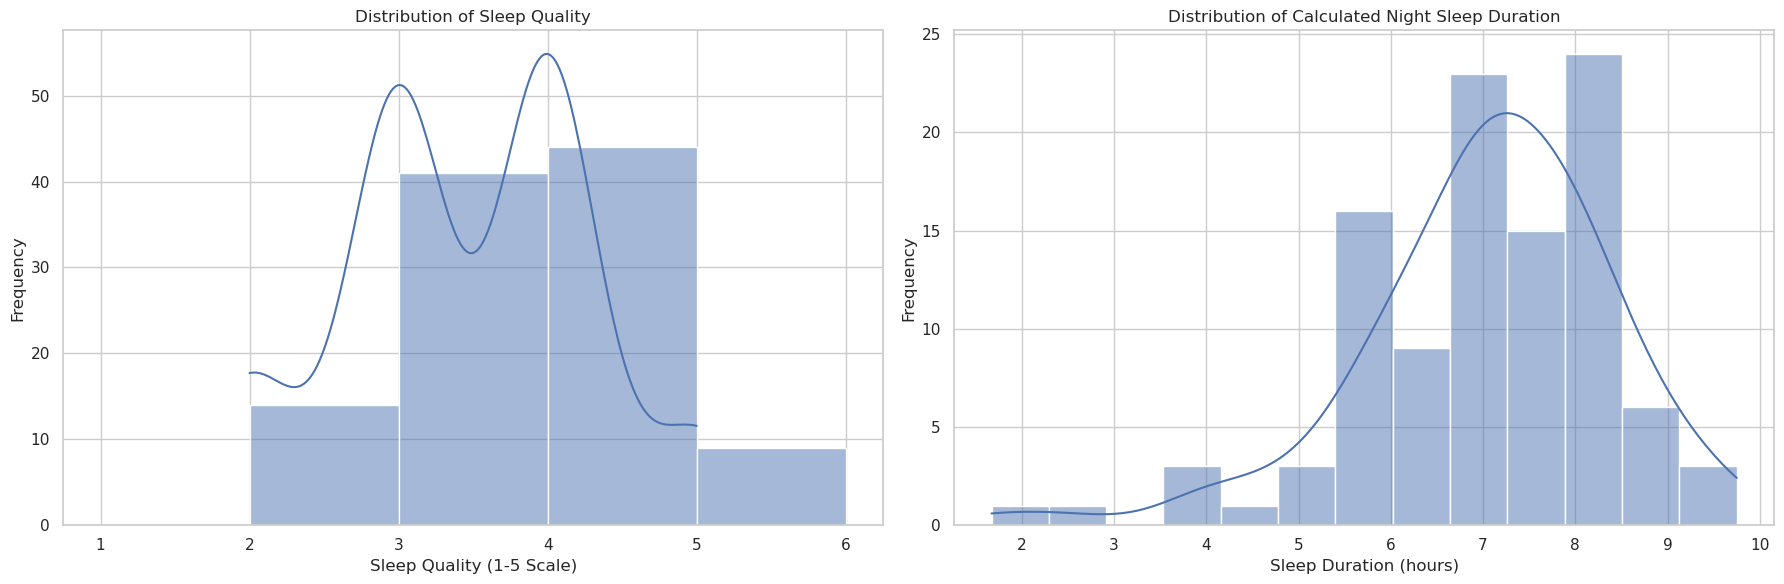

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting the code to display the two histograms as subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram for Sleep Quality
sns.histplot(df['Sleep Quality'], kde=True, bins=range(1, 7), ax=axes[0])
axes[0].set_title('Distribution of Sleep Quality')
axes[0].set_xlabel('Sleep Quality (1-5 Scale)')
axes[0].set_ylabel('Frequency')

# Histogram for Calculated Night Sleep Duration
sns.histplot(df['Calculated Night Sleep Duration'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Calculated Night Sleep Duration')
axes[1].set_xlabel('Sleep Duration (hours)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



**Distribution of Sleep Quality:**

The sleep quality scores are distributed mainly between 2 and 4, with the majority of respondents reporting a sleep quality of 3.
There's a smaller number of respondents with sleep quality scores of 5, indicating excellent sleep quality.

**Distribution of Calculated Night Sleep Duration:**

The histogram shows a fairly normal distribution centered around 7 hours, which aligns with general sleep recommendations.
There are fewer instances of very short (<5 hours) or very long (>9 hours) sleep durations.

These distributions provide a baseline understanding of sleep patterns among the respondents. Next, let's proceed with the box plots for sleep quality across different exercise frequencies and device usage categories, followed by a scatter plot for BMI vs. sleep quality and a bar chart for sleep disturbances. Let's start with the box plots. 

### Relationship with Sleep: Exercise and Device Usage

#### Sleep Quality

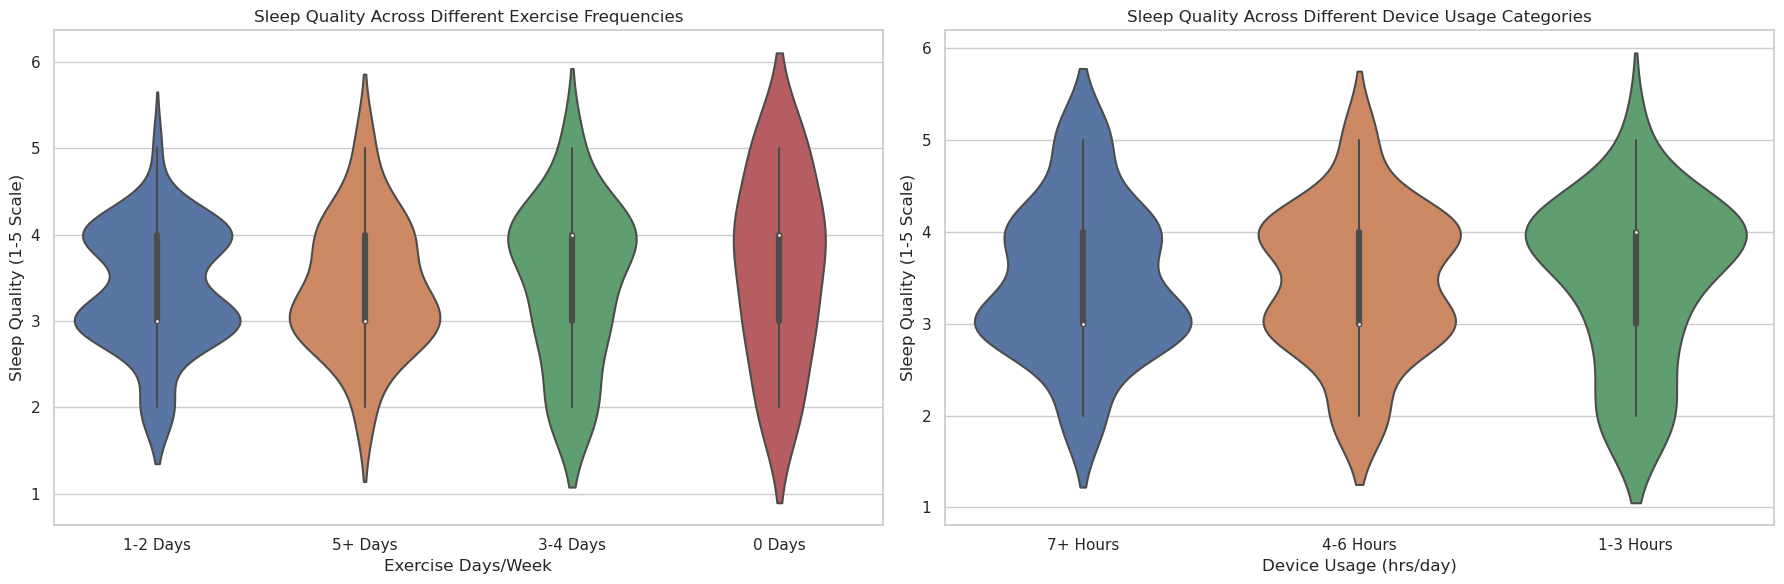

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Exercise Days/Week vs Sleep Quality
sns.violinplot(ax=axes[0], x='Exercise Days/Week', y='Sleep Quality', data=df)
axes[0].set_title('Sleep Quality Across Different Exercise Frequencies')
axes[0].set_xlabel('Exercise Days/Week')
axes[0].set_ylabel('Sleep Quality (1-5 Scale)')

# Device Usage (hrs/day) vs Sleep Quality
sns.violinplot(ax=axes[1], x='Device Usage (hrs/day)', y='Sleep Quality', data=df)
axes[1].set_title('Sleep Quality Across Different Device Usage Categories')
axes[1].set_xlabel('Device Usage (hrs/day)')
axes[1].set_ylabel('Sleep Quality (1-5 Scale)')

plt.tight_layout()
plt.show()

**Sleep Quality Across Different Exercise Frequencies:**

The plot shows the distribution of sleep quality scores for each exercise frequency category. While there is some variation in the spread and density of scores across categories, there is no clear pattern indicating a strong relationship between exercise frequency and sleep quality.

**Sleep Quality Across Different Device Usage Categories:**

Similar to exercise frequency, the distribution of sleep quality scores varies across device usage categories. However, there is no evident trend showing a significant impact of device usage on sleep quality.

#### Sleep Duration

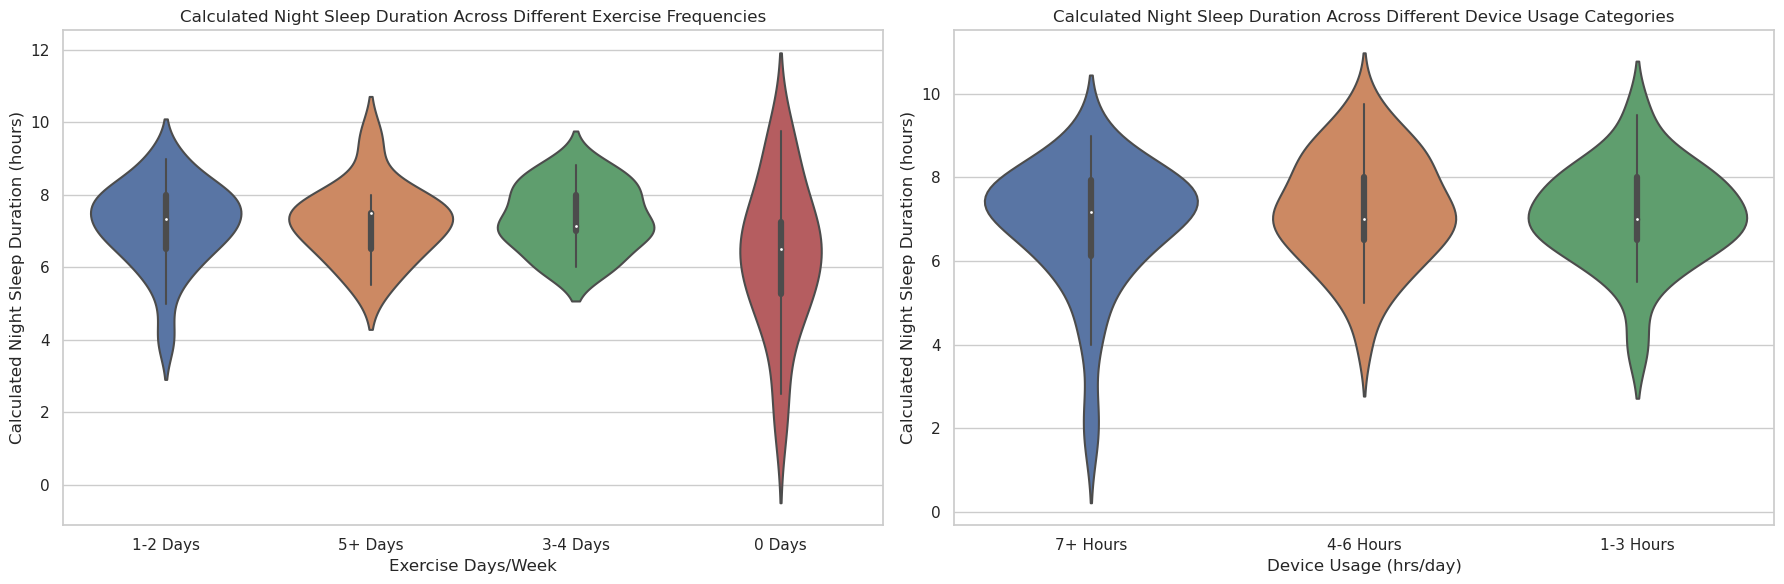

In [31]:
# Creating side-by-side violin plots for Exercise Days/Week and Device Usage (hrs/day) vs Calculated Night Sleep Duration

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Exercise Days/Week vs Calculated Night Sleep Duration
sns.violinplot(ax=axes[0], x='Exercise Days/Week', y='Calculated Night Sleep Duration', data=df)
axes[0].set_title('Calculated Night Sleep Duration Across Different Exercise Frequencies')
axes[0].set_xlabel('Exercise Days/Week')
axes[0].set_ylabel('Calculated Night Sleep Duration (hours)')

# Device Usage (hrs/day) vs Calculated Night Sleep Duration
sns.violinplot(ax=axes[1], x='Device Usage (hrs/day)', y='Calculated Night Sleep Duration', data=df)
axes[1].set_title('Calculated Night Sleep Duration Across Different Device Usage Categories')
axes[1].set_xlabel('Device Usage (hrs/day)')
axes[1].set_ylabel('Calculated Night Sleep Duration (hours)')

plt.tight_layout()
plt.show()



**General Trends:** The distribution of sleep duration across different exercise frequencies and device usage categories shows some variation, but not a distinct or consistent pattern that strongly suggests a direct relationship. For exercise, categories with higher frequencies ('3-4 Days', '5-6 Days') show a slightly more concentrated distribution around higher sleep durations, indicating a potential positive impact of regular exercise on sleep duration. However, this pattern is not uniformly observed across all exercise levels.


**Impact on Lower Sleep Duration Bounds:**


**Exercise:** In categories with lower exercise frequency ('0 Days', '1-2 Days'), the distribution has a tail extending towards shorter sleep durations. This suggests that within these groups, some individuals experience shorter sleep durations, potentially implicating lower physical activity as a factor in reduced sleep duration. This could be due to less physical tiredness, differing stress levels, or other lifestyle factors.

**Device Usage:** Similarly, for higher device usage categories ('5-7 Hours', '7+ Hours'), there's a noticeable extension towards shorter sleep durations. This indicates that among individuals with high screen time, a subset experiences shorter sleep. This could be attributed to factors like blue light exposure impacting circadian rhythms, increased mental stimulation, or the displacement of sleep time.
These observations highlight the complex and multifaceted nature of factors influencing sleep duration. While higher physical activity and lower device usage might be associated with longer sleep durations for some individuals, the variability within each category underlines the influence of multiple interacting factors. These insights provide a basis for further investigation into how lifestyle modifications, such as increasing physical activity or managing screen time, could potentially improve sleep duration, particularly for those currently experiencing shorter sleep.